In [1]:
from pyhive import hive
from TCLIService.ttypes import TOperationState


def execute_sql(query):
    
    conn = hive.Connection(host='lylg102',
                           port=10000,
                           auth='CUSTOM',
                           database='default',
                           username='dxg',
                           password='000000',
                           configuration={'hive.exec.reducers.max': '123'}
                      )
    cursor = conn.cursor()
    cursor.execute(query,  async_=True)
    status = cursor.poll().operationState
    while status in (TOperationState.INITIALIZED_STATE, TOperationState.RUNNING_STATE):
        status = cursor.poll().operationState
    res = cursor.fetchall()
    cursor.close()
    conn.close()
    return res

# 玫瑰图 pyecharts

In [2]:
import pandas as pd
from pyecharts import options as opts
from pyecharts.charts import Pie

from pyecharts.globals import CurrentConfig
from pyecharts.charts import Radar
    #图表样式库
from pyecharts.globals import ThemeType, SymbolType
sql_num = "SELECT job ,`salary` FROM jobs_info group by job,salary "
v3=[]
v4=[]
sh = execute_sql(sql_num)
for s in sh:
    v3.append(s[0])
    v4.append(s[1])
list002=[]
for i in v4:
    for j in i.split('-'):
        list002.append(j)
list003=[]
for i in list002:
    if len(i)==3:
        list003.append(i[0:2])   
    else:
        list003.append(i[0])
        
        

list004=[]
for i in list003:
    list004.append(int(i))
    
list005=[]
for i in list004:
    list005.append(i * 1000)
list006=[]
list007=[]
for index, value in enumerate(list005):
    if index % 2 ==0:
        list006.append(list005[index])
    else:
        list007.append(list005[index])
list008=[] 
list008=list006[0:10]
list009=[]
list009=v3[0:10]

data = {'工作名称':list009,
       '最低薪水':list008}
df = pd.DataFrame(data)
# print(df)
color_series = ['#FAE927','#E9E416','#C9DA36','#9ECB3C','#6DBC49',
                '#37B44E','#3DBA78','#14ADCF','#209AC9','#1E91CA',
                '#2C6BA0','#2B55A1','#2D3D8E','#44388E','#6A368B'
                '#7D3990','#A63F98','#C31C88','#D52178','#D5225B',
                '#D02C2A','#D44C2D','#F57A34','#FA8F2F','#D99D21',
                '#CF7B25','#CF7B25','#CF7B25']

# 提取数据
v = df['工作名称'].values.tolist()
d = df['最低薪水'].values.tolist()
# 绘制饼图
pie1 = Pie(init_opts=opts.InitOpts(width='1250px', height='750px'))
# 设置颜色
pie1.set_colors(color_series)

pie1.add("", [list(z) for z in zip(v, d)],
        radius=["30%", "100%"],
        center=["50%", "50%"],
        rosetype="area"
        )
# 设置全局配置项
pie1.set_global_opts(title_opts=opts.TitleOpts(title='不同工作的最低工资',subtitle='分析',
                                               title_textstyle_opts=opts.TextStyleOpts(font_size=25,color= '#0085c3'),
                                               subtitle_textstyle_opts= opts.TextStyleOpts(font_size=50,color= '#003399'),
                                               pos_right= 'center',pos_left= 'center',pos_top='42%',pos_bottom='center'
                                              ),
                     legend_opts=opts.LegendOpts(is_show=False),
                     toolbox_opts=opts.ToolboxOpts())
# 设置系列配置项
pie1.set_series_opts(label_opts=opts.LabelOpts(is_show=True, position="inside", font_size=12,
                                               formatter="{b}有:{c}元", font_style="italic",
                                               font_weight="bold", font_family="SimHei"
                                               ),
                     )
# 渲染在html页面上
pie1.render("html/玫瑰图.html")

'E:\\jupyter_test\\数据可视化实训\\IT\\html\\玫瑰图.html'

#  树形图 matplotlib

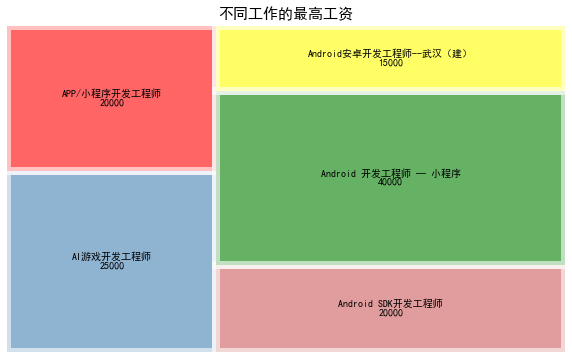

In [6]:
import pandas as pd
import  matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from  matplotlib.font_manager import FontProperties
import squarify
mpl.rcParams['font.sans-serif'] = ['SimHei']

plt.rcParams["font.size"]=10#设置字体大小

list100=[]
list101=[]
list102=[]
list102=list007[0:10]
list101=list009[5:]
list100=list102[5:]
df1=pd.Series(list100)
df2=pd.Series(list101)
plt.figure(figsize=(10,6))
colors=['steelblue','red','indianred','green','yellow','orange','pink','red','green','yellow']
plot=squarify.plot(
    sizes=df1,
    label=df2,
    color=colors,
    alpha=0.6,
    value=df1,
    edgecolor='white',
    linewidth=8)
plt.rc('font',size=15)
plot.set_title('不同工作的最高工资',fontdict={'fontsize':15})
plt.axis('off')
plt.tick_params(top='off',right='off')
plt.savefig('html/树形图.png')
plt.show()

# 火柴杆图 matplotlib

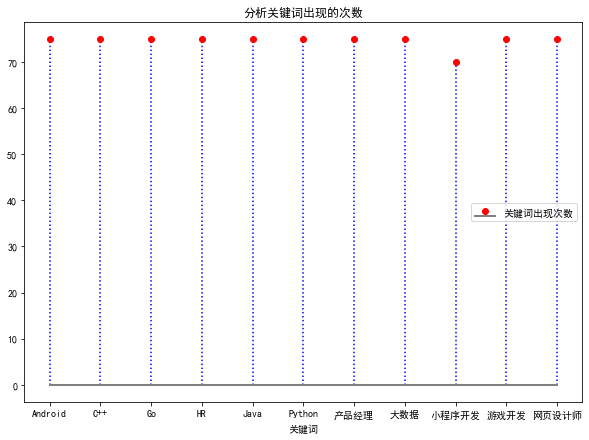

In [6]:
import pandas as pd
import  matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from  matplotlib.font_manager import FontProperties
import squarify
mpl.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams["font.size"]=10#设置字体大小
haha='SELECT keyword  `关键词` , COUNT(*) `次数` FROM jobs_info GROUP BY keyword'
sh1 = execute_sql(haha)

list103=[]
list104=[]
for i in sh1:
    list103.append(i[0])
    list104.append(i[1])
x =list103

y = list104

bottom = -0.1

hold = False
plt.figure(figsize=(10,7))
label = '关键词出现次数'
markerline, stemlines, baseline = plt.stem(x, y, bottom=bottom,
                                           label=label)

plt.setp(markerline, color='red', marker='o')
plt.setp(stemlines, color='blue', linestyle=':')
plt.setp(baseline, color='grey', linewidth=2, linestyle='-')
plt.xlabel('关键词')
plt.ylabel('次数')
plt.title('分析关键词出现的次数')
plt.ylabel('')
plt.legend()
plt.savefig('html/火柴杆图.png')
plt.show()

# 条形图 matplotlib

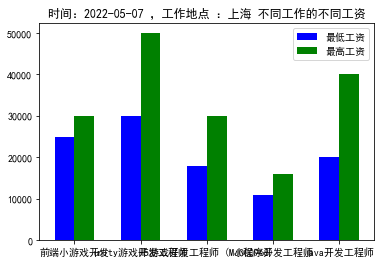

In [9]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
hh="select job ,salary from jobs_info where place ='上海' and pubtime = '2022-05-07' "

sh2 = execute_sql(hh)
list105=[]
list106=[]
for i in sh2:
    list105.append(i[0])
    list106.append(i[1])
list107=[]
list108=[]
list107=list105[-5:]
list108=list106[-5:]
list202=[]
for i in list108:
    for j in i.split('-'):
        list202.append(j)
list203=[]
for i in list202:
    if len(i)==3:
        list203.append(i[0:2])   
    else:
        list203.append(i[0])
        
        

list204=[]
for i in list203:
    list204.append(int(i))
    
list205=[]
for i in list204:
    list205.append(i * 1000)
list206=[]
list207=[]
for index, value in enumerate(list205):
    if index % 2 ==0:
        list206.append(list205[index])
    else:
        list207.append(list205[index])
bar_width = 0.3# 条形宽度
index_male = np.arange(len(list107)) 
index_female = index_male + bar_width 

# 使用两次 bar 函数画出两组条形图
plt.bar(index_male, height=list206, width=bar_width, color='b', label='最低工资')
plt.bar(index_female, height=list207, width=bar_width, color='g', label='最高工资')

plt.legend()  # 显示图例
plt.xticks(index_male + bar_width/2, list107,fontsize=10)  #
plt.title('时间：2022-05-07 ，工作地点 ：上海 不同工作的不同工资')  # 图形标题
plt.savefig('html/条形图.png')
plt.show()


# 漏斗图 pyecharts

In [10]:
from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_NOTEBOOK

from pyecharts import options as opts
from pyecharts.charts import Funnel, Page
hh="select job ,salary from jobs_info where place ='北京' and pubtime = '2022-05-08' "
sh3 = execute_sql(hh)

list111=[]
list112=[]
for i in sh3:
    list111.append(i[0])
    list112.append(i[1])
list113=[]
list114=[]
list113=list111[-5:]
list114=list112[-5:]

list302=[]
for i in list114:
    for j in i.split('-'):
        list302.append(j)
list303=[]
for i in list302:
    if len(i)==3:
        list303.append(i[0:2])   
    else:
        list303.append(i[0])
        
        

list304=[]
for i in list303:
    list304.append(int(i))
    
list305=[]
for i in list304:
    list305.append(i * 1000)
list306=[]
list307=[]
for index, value in enumerate(list305):
    if index % 2 ==0:
        list306.append(list305[index])
    else:
        list307.append(list305[index])
def funnel_label() -> Funnel:
    c = (
        Funnel()
        .add("工资分析",
            [list(z) for z in zip(list113, list306)],
            sort_="descending",               #默认是sort_="descending"即从大到小，也可以设置为ascending即反向漏斗
            label_opts=opts.LabelOpts(position="inside"),
        )
        .set_global_opts(title_opts=opts.TitleOpts(title="", subtitle="分析"),
                         toolbox_opts=opts.ToolboxOpts(),
                         legend_opts=opts.LegendOpts(is_show=True)
                        )
    )
    return c

#第一次渲染时候调用load_javasrcript文件
funnel_label().load_javascript()
#展示数据可视化图表
funnel_label().render("html/漏斗图.html")

'E:\\jupyter_test\\数据可视化实训\\IT\\html\\漏斗图.html'

# 环图 pyecharts

In [11]:
import pandas as pd
from pyecharts.charts import Pie
from pyecharts import options as opts
 



pie = (
       Pie()
       .add('', [list(z) for z in zip(list113, list307)],radius=[80,150])
       .set_global_opts(title_opts=opts.TitleOpts(title="时间：2022-05-07 ，工作地点 ：北京 不同工作的最高工资",
                                                  subtitle="分析",
                                                  pos_left="center",
                                                  pos_bottom="center"),
                        legend_opts=opts.LegendOpts(pos_left="left",
                                                    orient="vertical"),
       )
       )
pie.render("html/环图.html")
pie.render_notebook()         # pyecharts.Base.render 渲染图表到 HTML 文件 默认render.html

# 词云图 pyecharts

In [3]:
import pandas as pd
import jieba
from collections import Counter
import pyecharts.options as opts
from pyecharts.charts import WordCloud
from pyecharts.charts import Radar
sql_a="select tags  ,`welfare` , `requirement`  from jobs_info "
sh4 = execute_sql(sql_a)

text = str(sh4)
def split_word(text):
    word_list = list(jieba.cut(text))
    # 去掉一些无意义的词和符号，我这里自己整理了停用词库
    with open('res/停用词库.txt',encoding='utf-8') as f:
        meaningless_word = f.read()
        # print(meaningless_word)
    result = []
    # 筛选词语
    for i in word_list:
        if i not in meaningless_word:
            result.append(i.replace(' ', ''))
    return result
def word_counter(words):
    # 词频统计,使用Count计数方法
    words_counter = Counter(words)
    # 将Counter类型转换为列表
    words_list = words_counter.most_common(2000)
    return words_list
def word_cloud(data):
    (
        WordCloud()
            .add(series_name="热点分析",
                 # 添加数据
                 data_pair=data,
                 # 字间隙
                 word_gap = 5,
                 # 调整字大小范围
                 word_size_range=[15, 80],
                 shape="cursive",
                 mask_image='res/haha.jpg')
            .set_global_opts(
            title_opts=opts.TitleOpts(
                title="热点分析", title_textstyle_opts=opts.TextStyleOpts(font_size=23)
            ),
            tooltip_opts=opts.TooltipOpts(is_show=True),
        )
        # 输出为html格式
            .render("html/词云图.html")
    )
def main():
    
    words = split_word(text)
    data = word_counter(words)
    word_cloud(data)

if __name__ == '__main__':

    main()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\DXG\AppData\Local\Temp\jieba.cache
Loading model cost 1.424 seconds.
Prefix dict has been built successfully.


# 子图 matplotlib

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import squarify
from matplotlib.pyplot import MultipleLocator
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False



plt.figure(figsize=(20,8))      #设置图形大小
plt.xticks(rotation=90,ha='right')
plt.subplot(231)
data1 = list009
data2 = list008
list120=[]
list120=list007[0:10]
data3=list120

list30=list003.copy()
list40=list004.copy()
list50=[]
list50=list30[0:10]
list60=[]
list60=list40[0:10]
data4=pd.Series(list50)
data5=pd.Series(list60)

bar_width = 0.3
# 绘图

plt.bar(data1, data2, label = '不同职业的最低工资', color = 'steelblue', alpha = 0.8)
# plt.bar(data1, data5, label = '动漫总计评分人数', color = 'indianred', alpha = 0.8)



plt.title('分析')
plt.xticks(rotation=90,ha='right')
plt.subplot(232)


plt.plot(data1, data3,c='red', alpha=0.5)
# plt.legend(fontsize=8,loc='upper right')
plt.xlabel('名称')
plt.ylabel('工资')
plt.title('分析')



plt.xticks(rotation=90,ha='right')
plt.subplot(233)

plot=squarify.plot(
    sizes=data5,
    label=data4,
    alpha=0.6,
    value=data5,
    edgecolor='white',
    linewidth=8
       )

plt.title('分析')

plt.suptitle('分析', fontsize=12)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None,wspace=0.5, hspace=0.5)
plt.savefig('html/子图.png')
plt.show()

<Figure size 2000x800 with 3 Axes>

# 散点图 pyecharts

In [7]:
from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_NOTEBOOK

from pyecharts import options as opts
from pyecharts.charts import EffectScatter, Page
from pyecharts.globals import SymbolType


def effectscatter_splitline() -> EffectScatter:
    c = (
        EffectScatter()
        .add_xaxis(list103)
        .add_yaxis("",list104, symbol=SymbolType.ARROW)
        .set_global_opts(
            title_opts=opts.TitleOpts(title="关键词出现的次数", subtitle="分析"),
            xaxis_opts=opts.AxisOpts(splitline_opts=opts.SplitLineOpts(is_show=True)),
            yaxis_opts=opts.AxisOpts(splitline_opts=opts.SplitLineOpts(is_show=True)),
            toolbox_opts=opts.ToolboxOpts(),
            legend_opts=opts.LegendOpts(is_show=True)

        )
    )

    return c

effectscatter_splitline().render("html/散点图.html")


'E:\\jupyter_test\\数据可视化实训\\IT\\html\\散点图.html'

# 象形图  pyecharts

In [8]:
from pyecharts.charts import *
from pyecharts.components import Table
from pyecharts import options as opts
from pyecharts.commons.utils import JsCode
import random
import datetime

pictorialBar = (PictorialBar()
                .add_xaxis(list009)
                .add_yaxis('',list008)
                )

pictorialBar.render("html/象形图.html")

'E:\\jupyter_test\\数据可视化实训\\IT\\html\\象形图.html'

# 将分析图组成HTML页面

In [11]:
head = '''
<!DOCTYPE html>
<html>
<head>
    <meta charset="UTF-8">
    <title>IT Job visualization</title>
    <script type="text/javascript" src="https://assets.pyecharts.org/assets/echarts.min.js"></script>
    <script type="text/javascript" src="https://assets.pyecharts.org/assets/echarts-wordcloud.min.js"></script>
    <script>function refresh(){window.location.reload();}function refresh2(){if(sessionStorage.getItem("isReload")){ console.log("页面被刷新");}else{ console.log("首次被加载");sessionStorage.setItem("isReload", true);setTimeout('refresh()', 100);}}setTimeout('refresh2()', 10);</script>
</head>
<body>
'''
tail = '''
</body>
</html>
'''

In [12]:
import re

PICS = ["玫瑰图","词云图","散点图","漏斗图","环图","象形图"]
PICS2 = ['条形图','树形图','火柴杆图','子图']
with open("html/index.html",'w') as f:
    f.write("")
    f.close()
f = open("html/index.html",'a',encoding='utf-8')
f.write(head)
for pic_ in PICS:    
    f1 = open("html/"+pic_+".html",'r',encoding='utf-8')
    res = re.findall('<body>(.*?)</body>',f1.read(),re.S)[0]
    f.write("<h2>"+pic_+"</h2>"+res)
    f1.close()
    print(pic_)
for pic_ in PICS2:
    f.write("<h2>"+pic_+"</h2>"+f'<img src="{pic_}.png">')
    f1.close()
    print(pic_)
f.write(tail)
f.close()

玫瑰图
词云图
散点图
漏斗图
环图
象形图
条形图
树形图
火柴杆图
子图
